<a href="https://colab.research.google.com/github/DashSaurav/Geo-Analysis-India/blob/main/route_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travelling Salesman Problem

In [19]:
import geopandas as gpd
import networkx as nx
import geopy
import matplotlib.pyplot as plt
import numpy as np
import networkx.algorithms.approximation as nx_app
import math

%matplotlib inline
from shapely.geometry import Polygon
from itertools import permutations
import warnings
warnings.filterwarnings(action = "ignore")


In [20]:
# !pip install geopandas
# !apt install libgraphviz-dev
# !pip install pygraphviz

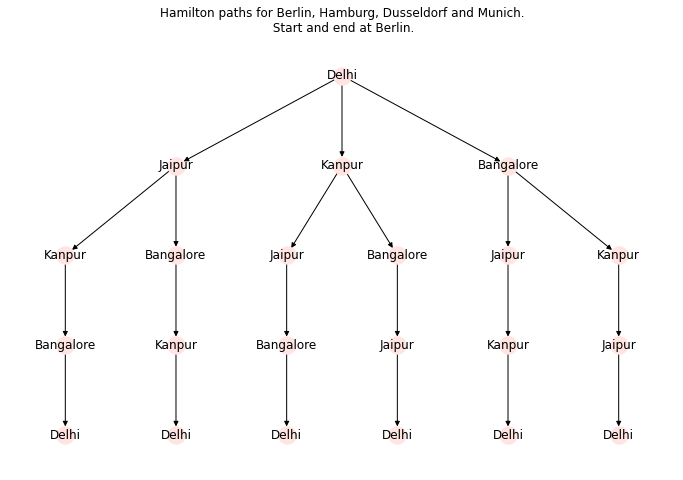

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
# import pygraphviz

cities = ["Delhi","Jaipur","Kanpur","Bangalore","Delhi"]

def make_tsp_tree(cities):
    """
    Create all Hamilton paths from start to end city from a list of cities.
    Creates a directed prefix tree from a list of the created paths. 
    Remove the root node and nil node.
    """
    start, *rest, end = cities
    paths = [(start, *path, end) for path in permutations(rest)]
    
    #Creates a directed prefix from a list of paths
    G = nx.prefix_tree(paths)
    
    #remove synthetic root node (None) and nil node (NIL)
    G.remove_nodes_from([0, -1])
    
    return G

#Get graph object with all Hamilton paths
G = make_tsp_tree(cities)

#Create node positions for G using Graphviz.
#Available layouts: https://graphviz.org/docs/layouts/
#dot gives hierarchical or layered drawings of directed graphs
#possible layouts: neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten.
positions = nx.nx_agraph.graphviz_layout(G, "dot")

plt.figure(figsize = (12,8))

#Draw networkx Graph object with labels off
nx.draw_networkx(G,
                 pos = positions,
                 node_color = "mistyrose",
                 with_labels= False)

#Draw NetworkX Graph object with defined labels for each node
nx.draw_networkx_labels(G,
                        pos = positions,
                        labels = dict(G.nodes(data = "source")))

plt.title("Hamilton paths for Berlin, Hamburg, Dusseldorf and Munich.\n Start and end at Berlin.")
plt.axis("off")
plt.show()

Geocoding

In [22]:
def get_coordinates(place):
    place_details = geolocator.geocode(place)
    
    coordinates = (place_details[1][0], place_details[1][1])
    
    #latitude, longitude
    return coordinates[1], coordinates[0]

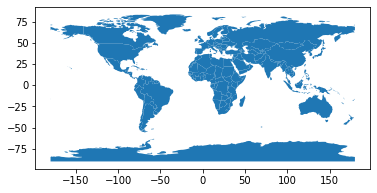

In [23]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot()

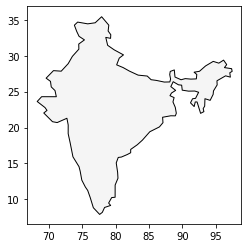

In [25]:
germany = world[world.name == "India"]
germany.plot(color = "whitesmoke", edgecolor = "black")

getting the co-ordinates

In [66]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "app")

capitals = ['Delhi', 'Chandigarh', 'Jaipur', 'Kanpur', 'Bangalore', 'Chennai', 'Patna','Panaji','	Thiruvananthapuram','Bhubaneswar']

#Initialise empty list to get coordinates of each city
coordinates = []

for capital in capitals:
    globals()["%s_coordinate"%capital] = get_coordinates(capital)
    coordinates.append(globals()["%s_coordinate"%capital])
    
coordinates

[(77.1716954, 28.6273928),
 (76.7797143, 30.7334421),
 (75.8189817, 26.9154576),
 (80.3217588, 26.4609135),
 (77.590082, 12.9767936),
 (80.270186, 13.0836939),
 (85.1235252, 25.6093239),
 (73.8282141, 15.4989946),
 (76.9360573, 8.5241122),
 (85.81140263163533, 20.28105765)]

In [67]:
i = 1
for x, y in coordinates:
    print (i, y*1000, x*1000)
    i+=1

1 28627.392799999998 77171.69540000001
2 30733.4421 76779.71429999999
3 26915.4576 75818.98169999999
4 26460.9135 80321.7588
5 12976.7936 77590.082
6 13083.6939 80270.186
7 25609.3239 85123.5252
8 15498.9946 73828.2141
9 8524.1122 76936.0573
10 20281.057650000002 85811.40263163533


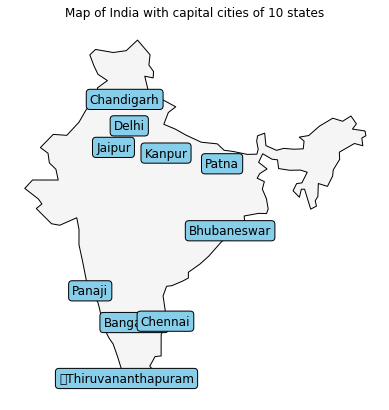

In [69]:
G = nx.Graph()
#Create a graph object with number of nodes same as number of cities
nodes = np.arange(0, len(capitals))
G.add_nodes_from(nodes)

#Create a dictionary of node and coordinate of each state for positions
positions = {node:coordinate for node, coordinate in zip(nodes, coordinates)}

#Create a dictionary of node and capital for labels
labels = {node:capital for node, capital in zip(nodes, capitals)}

fig, ax = plt.subplots(figsize = (10, 7))
germany.plot(color = "whitesmoke", edgecolor = "black", ax = ax)
nx.draw_networkx(G, pos = positions,
                 labels = labels, ax = ax,
                 bbox = dict(facecolor = "skyblue", boxstyle = "round",
                             ec = "black", pad = 0.3),)

plt.title("Map of India with capital cities of 10 states")
plt.axis("off")
plt.show()

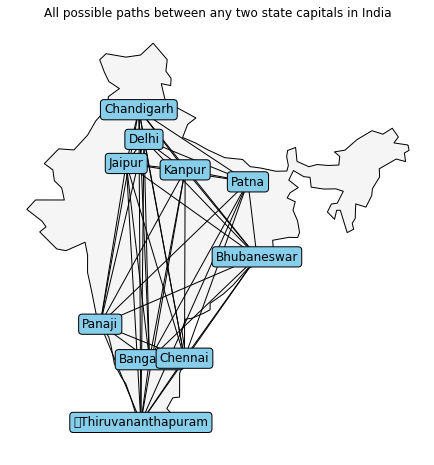

In [70]:
for i in nodes:
    for j in nodes:
        if i!=j:
            G.add_edge(i, j)

fig, ax = plt.subplots(figsize = (12, 8))

germany.plot(color = "whitesmoke", edgecolor = "black", ax = ax)

nx.draw_networkx(G, pos = positions, labels = labels,
                 bbox = dict(facecolor = "skyblue", boxstyle = "round",
                             ec = "black", pad = 0.3),
                 ax = ax)

plt.title("All possible paths between any two state capitals in India")

plt.axis("off")
plt.savefig("all possible paths.jpeg",
           dpi = 300)
plt.show()

Total number of possible paths = n(n-1)/2 = 10*9/2

In [71]:
len(G.edges)

45

In [72]:
pos = {node:list(coordinate) for node, coordinate in zip(nodes, coordinates)}
pos

{0: [77.1716954, 28.6273928],
 1: [76.7797143, 30.7334421],
 2: [75.8189817, 26.9154576],
 3: [80.3217588, 26.4609135],
 4: [77.590082, 12.9767936],
 5: [80.270186, 13.0836939],
 6: [85.1235252, 25.6093239],
 7: [73.8282141, 15.4989946],
 8: [76.9360573, 8.5241122],
 9: [85.81140263163533, 20.28105765]}

Christofides algorithm

In [73]:
H = G.copy()

# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        
        #Multidimensional Euclidean distance from the origin to a point.
        #euclidean distance between (x1, y1) and (x2, y2) is ((x2-x1)**2 + (y2-y1)**2)**0.5
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist
        G.add_edge(i, j, weight=dist)
        


cycle = nx_app.christofides(G, weight="weight")

edge_list = list(nx.utils.pairwise(cycle))

In [74]:
#Remove selfloops if necessary
loop_nodes = nx.nodes_with_selfloops(G)

try:
    node = next(loop_nodes)
except StopIteration:
    pass
else:
    G = G.copy()
    G.remove_edge(node, node)
    G.remove_edges_from((n, n) for n in loop_nodes)

In [75]:
# Check that G is a complete graph
N = len(G) - 1

# This check ignores selfloops which is what we want here.
if any(len(nbrdict) != N for n, nbrdict in G.adj.items()):
    raise nx.NetworkXError("G must be a complete graph.")

In [76]:
# 1. Create a minimum spanning tree T of G
tree = nx.minimum_spanning_tree(G, weight="weight")
    
tree

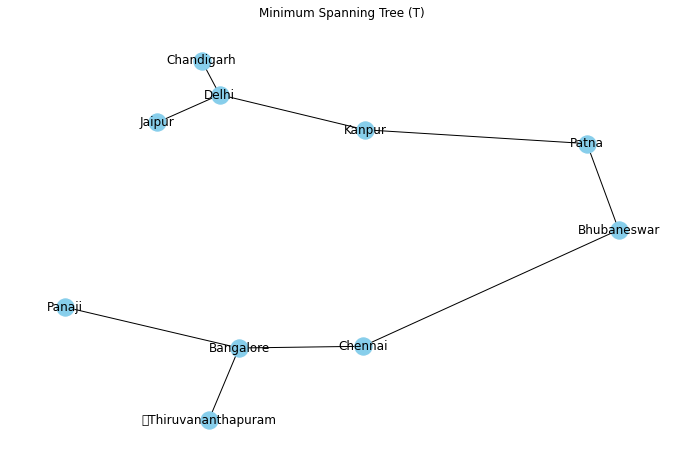

In [77]:
plt.figure(figsize = (12, 8))
nx.draw_networkx(tree, labels = labels, pos = positions,
                #node_size = 100,
                node_color = "skyblue")

plt.title("Minimum Spanning Tree (T)")

plt.axis("off")

plt.savefig("minimum spanning tree.jpeg",
           dpi = 300)

In [78]:
# 2. Make a set of nodes in T with odd degree O
L = tree.copy()
L.remove_nodes_from([v for v, degree in tree.degree if not (degree % 2)])
L

In [79]:
L.nodes

NodeView((0, 1, 2, 4, 7, 8))

In [80]:
labels

{0: 'Delhi',
 1: 'Chandigarh',
 2: 'Jaipur',
 3: 'Kanpur',
 4: 'Bangalore',
 5: 'Chennai',
 6: 'Patna',
 7: 'Panaji',
 8: '\tThiruvananthapuram',
 9: 'Bhubaneswar'}

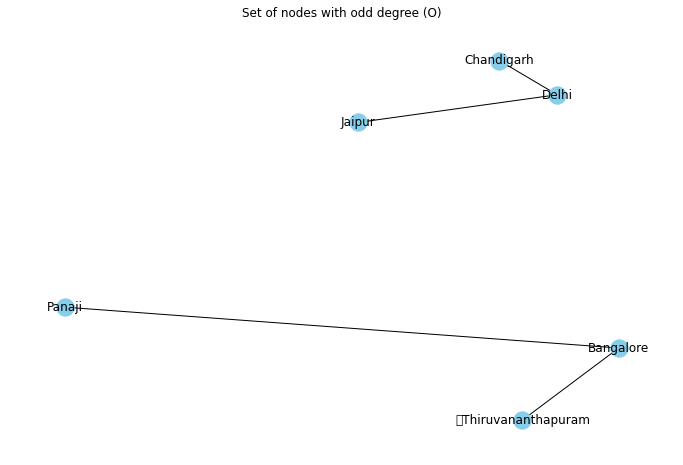

In [81]:
plt.figure(figsize = (12, 8))
nx.draw_networkx(L, pos = positions,
                labels = {node:labels[node] for node in L.nodes},
                node_color = "skyblue")

plt.title("Set of nodes with odd degree (O)")

plt.axis("off")

plt.savefig("set of nodes with odd degree.jpeg",
           dpi = 300)

In [82]:
# 3. Find a minimum-weight perfect matching M in the induced subgraph given by the vertices from O.
def perfect_matching(G, weight = "weight", tree = None):
    loop_nodes = nx.nodes_with_selfloops(G)
    try:
        node = next(loop_nodes)
    except StopIteration:
        pass
    else:
        G = G.copy()
        G.remove_edge(node, node)
        G.remove_edges_from((n, n) for n in loop_nodes)
    # Check that G is a complete graph
    N = len(G) - 1
    # This check ignores selfloops which is what we want here.
    if any(len(nbrdict) != N for n, nbrdict in G.adj.items()):
        raise nx.NetworkXError("G must be a complete graph.")

    if tree is None:
        tree = nx.minimum_spanning_tree(G, weight=weight)
    L = G.copy()
    L.remove_nodes_from([v for v, degree in tree.degree if not (degree % 2)])
    MG = nx.MultiGraph()
    #MG.add_edges_from(tree.edges)
    edges = nx.min_weight_matching(L, maxcardinality=True, weight=weight)
    MG.add_edges_from(edges)
    return MG

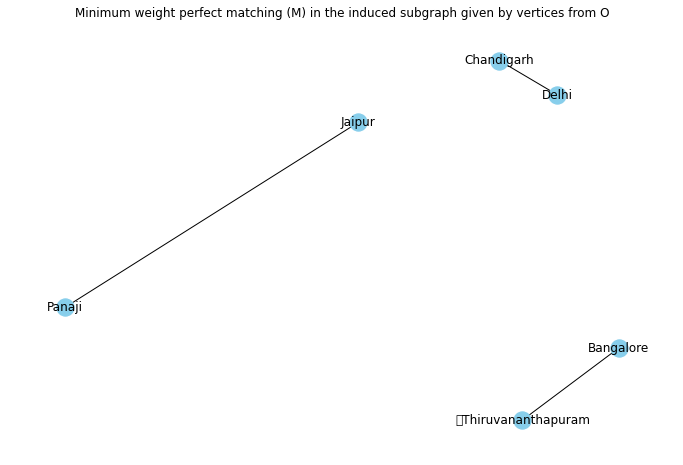

In [83]:
MG = perfect_matching(G)

plt.figure(figsize = (12, 8))

nx.draw_networkx(MG, labels = {node:labels[node] for node in MG.nodes},
                 pos = positions,
                node_color = "skyblue")

plt.title("Minimum weight perfect matching (M) in the induced subgraph given by vertices from O")

plt.axis("off")

plt.savefig("Minimum weight perfect matching in M in the induced subgraph given by vertices from O.jpeg",
           dpi = 300)


In [84]:
# 4. Combine the edges of M and T to form a connected multigraph H in which each vertex has even degree.
def multigraph(G, weight = "weight", tree = None):
    loop_nodes = nx.nodes_with_selfloops(G)
    try:
        node = next(loop_nodes)
    except StopIteration:
        pass
    else:
        G = G.copy()
        G.remove_edge(node, node)
        G.remove_edges_from((n, n) for n in loop_nodes)
    # Check that G is a complete graph
    N = len(G) - 1
    # This check ignores selfloops which is what we want here.
    if any(len(nbrdict) != N for n, nbrdict in G.adj.items()):
        raise nx.NetworkXError("G must be a complete graph.")

    if tree is None:
        tree = nx.minimum_spanning_tree(G, weight=weight)
    L = G.copy()
    L.remove_nodes_from([v for v, degree in tree.degree if not (degree % 2)])
    MG = nx.MultiGraph()
    MG.add_edges_from(tree.edges)
    
    edges = nx.min_weight_matching(L, maxcardinality=True, weight=weight)
    MG.add_edges_from(edges)
    return MG

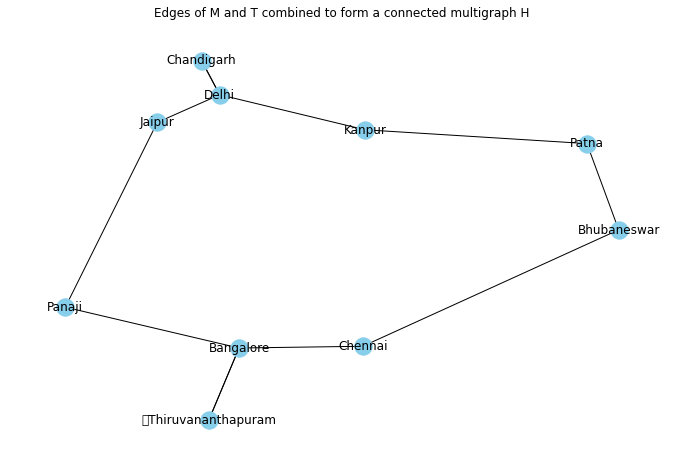

In [85]:
MG = multigraph(G)

plt.figure(figsize = (12, 8))

nx.draw_networkx(MG, pos = positions, labels = labels, node_color = "skyblue")

plt.title("Edges of M and T combined to form a connected multigraph H")

plt.axis("off")

plt.savefig("Edges of M and T combined to form a connected multigraph H.jpeg",
           dpi = 300)

plt.show()

In [86]:
# 4. Build an Eulerian circuit using the edges of M and T
#@not_implemented_for("directed")
def christofides(G, weight="weight", tree=None):
    """Approximate a solution of the traveling salesman problem

    Compute a 3/2-approximation of the traveling salesman problem
    in a complete undirected graph using Christofides [1]_ algorithm.

    Parameters
    ----------
    G : Graph
        `G` should be a complete weighted undirected graph.
        The distance between all pairs of nodes should be included.

    weight : string, optional (default="weight")
        Edge data key corresponding to the edge weight.
        If any edge does not have this attribute the weight is set to 1.

    tree : NetworkX graph or None (default: None)
        A minimum spanning tree of G. Or, if None, the minimum spanning
        tree is computed using :func:`networkx.minimum_spanning_tree`

    Returns
    -------
    list
        List of nodes in `G` along a cycle with a 3/2-approximation of
        the minimal Hamiltonian cycle.

    References
    ----------
    .. [1] Christofides, Nicos. "Worst-case analysis of a new heuristic for
       the travelling salesman problem." No. RR-388. Carnegie-Mellon Univ
       Pittsburgh Pa Management Sciences Research Group, 1976.
    """
    # Remove selfloops if necessary
    loop_nodes = nx.nodes_with_selfloops(G)
    try:
        node = next(loop_nodes)
    except StopIteration:
        pass
    else:
        G = G.copy()
        G.remove_edge(node, node)
        G.remove_edges_from((n, n) for n in loop_nodes)
    # Check that G is a complete graph
    N = len(G) - 1
    # This check ignores selfloops which is what we want here.
    if any(len(nbrdict) != N for n, nbrdict in G.adj.items()):
        raise nx.NetworkXError("G must be a complete graph.")

    if tree is None:
        tree = nx.minimum_spanning_tree(G, weight=weight)
    L = G.copy()
    L.remove_nodes_from([v for v, degree in tree.degree if not (degree % 2)])
    MG = nx.MultiGraph()
    MG.add_edges_from(tree.edges)
    edges = nx.min_weight_matching(L, maxcardinality=True, weight=weight)
    MG.add_edges_from(edges)
    return _shortcutting(nx.eulerian_circuit(MG))

def _shortcutting(circuit):
    """Remove duplicate nodes in the path"""
    nodes = []
    for u, v in circuit:
        if v in nodes:
            continue
        if not nodes:
            nodes.append(u)
        nodes.append(v)
    nodes.append(nodes[0])
    return nodes

In [87]:
eulerian_cycle = christofides(G)
eulerian_cycle

[0, 3, 6, 9, 5, 4, 8, 7, 2, 1, 0]

In [88]:
eulerian_edge_list = list(nx.utils.pairwise(eulerian_cycle))

eulerian_edge_list

[(0, 3),
 (3, 6),
 (6, 9),
 (9, 5),
 (5, 4),
 (4, 8),
 (8, 7),
 (7, 2),
 (2, 1),
 (1, 0)]

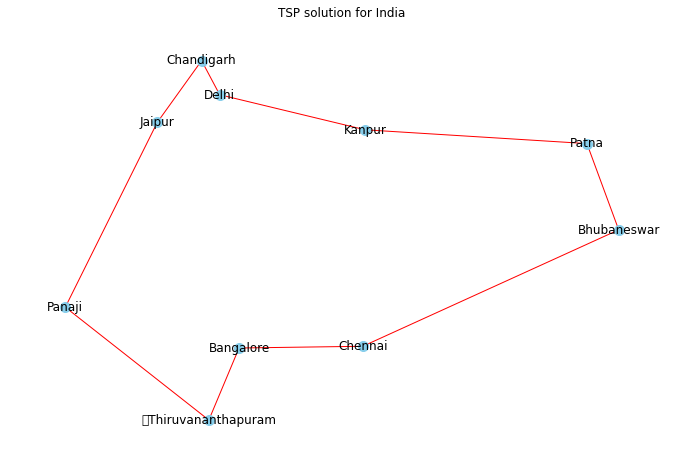

In [89]:
plt.figure(figsize = (12, 8))

#TSP solution route
nx.draw_networkx(G, pos = positions, labels = labels, node_size=100, node_color = "skyblue",
                 edgelist=eulerian_edge_list, edge_color="red", width = 1
                )

plt.axis("off")

plt.title("TSP solution for India")
plt.savefig("tsp solution 1.jpeg",
           dpi = 300)

plt.show()

Calculating the distances between the nodes as edge's weight.

In [90]:
#Create a dictionary of node and capital for labels
labels = {node:capital for node, capital in zip(nodes, capitals)}
tsp_cycle = [labels[value] for value in cycle]
print (tsp_cycle)

['Delhi', 'Kanpur', 'Patna', 'Bhubaneswar', 'Chennai', 'Bangalore', '\tThiruvananthapuram', 'Panaji', 'Jaipur', 'Chandigarh', 'Delhi']


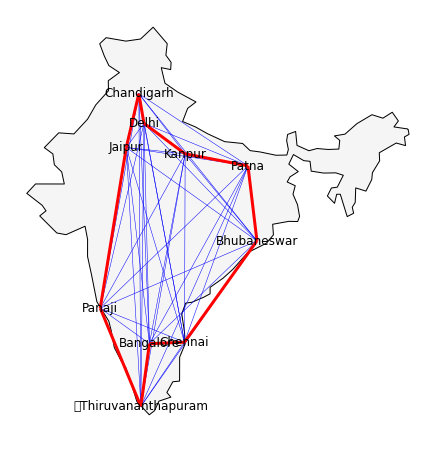

In [91]:
fig, ax = plt.subplots(figsize = (12, 8))
germany.plot(color = "whitesmoke", edgecolor = "black", ax = ax)

#All possible routes
nx.draw_networkx_edges(H, pos = positions, edge_color="blue", width=0.5, ax = ax)

#TSP solution route
nx.draw_networkx(G, pos = positions, labels = labels, node_size=0,
                 edgelist=edge_list, edge_color="red", width = 3, ax = ax)

plt.axis("off")
plt.show()

In [92]:
H.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [93]:
H.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)])

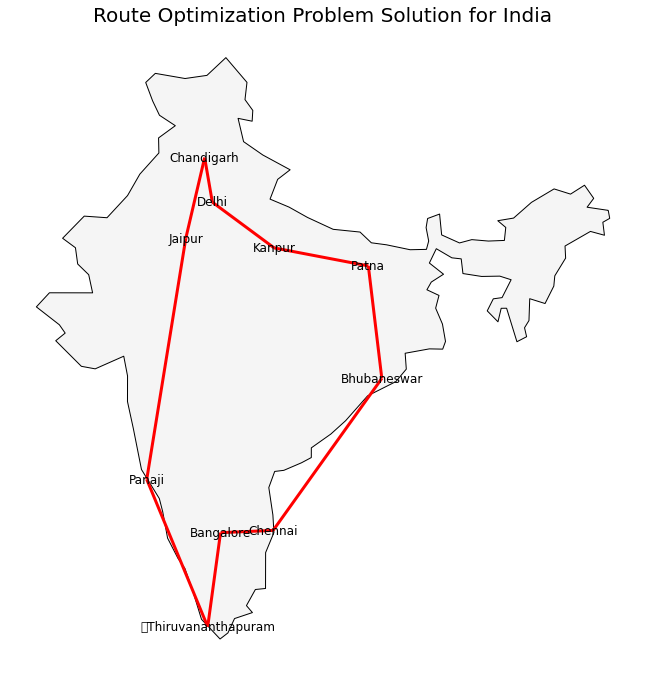

In [94]:
fig, ax = plt.subplots(figsize = (20, 12))
germany.plot(ax = ax, 
          color = "whitesmoke",
          edgecolor = "black")

# Draw the route
nx.draw_networkx(
    G,
    pos = positions,
    labels = labels,
    edgelist=edge_list,
    edge_color="red",
    #node_color = "#ffffff", #transparent
    node_size=0,
    width=3,
    ax = ax,
    #bbox = dict(facecolor = "white", boxstyle = "round",ec = "silver")
)

plt.title("Route Optimization Problem Solution for India",
         fontsize = 20)

plt.axis("off")
plt.savefig("tsp solution with red route.jpeg",
           dpi = 300)


plt.show()

In [95]:
edge_list_cities = []

for x,y in edge_list:
    edge_list_cities.append((labels[x], labels[y]))
    
edge_list_cities

[('Delhi', 'Kanpur'),
 ('Kanpur', 'Patna'),
 ('Patna', 'Bhubaneswar'),
 ('Bhubaneswar', 'Chennai'),
 ('Chennai', 'Bangalore'),
 ('Bangalore', '\tThiruvananthapuram'),
 ('\tThiruvananthapuram', 'Panaji'),
 ('Panaji', 'Jaipur'),
 ('Jaipur', 'Chandigarh'),
 ('Chandigarh', 'Delhi')]

# with some colors

In [96]:
import random
get_colors = lambda n: list(map(lambda i: "#" +"%06x" % random.randint(0, 0xffffff),range(n)))
get_colors(10)

['#357c38',
 '#083837',
 '#d0009b',
 '#96f9ce',
 '#85e6b8',
 '#081530',
 '#034db5',
 '#1fbc07',
 '#39404a',
 '#c86c6a']

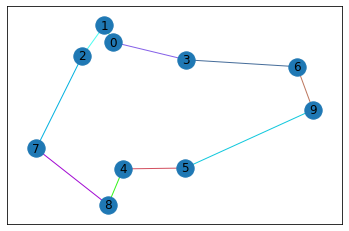

In [97]:
nx.draw_networkx(G,
                pos = positions,
                edgelist = edge_list,
                edge_color = get_colors(10))

In [98]:
print("The route of the traveller is:", cycle)

The route of the traveller is: [0, 3, 6, 9, 5, 4, 8, 7, 2, 1, 0]


In [99]:
labels

{0: 'Delhi',
 1: 'Chandigarh',
 2: 'Jaipur',
 3: 'Kanpur',
 4: 'Bangalore',
 5: 'Chennai',
 6: 'Patna',
 7: 'Panaji',
 8: '\tThiruvananthapuram',
 9: 'Bhubaneswar'}